In [8]:
from pathlib import Path
from types import SimpleNamespace

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [41]:
data_path = r"C:\Users\PFA\gdrive\PuRe-data"

params = SimpleNamespace(
    dataset=[],
    size=[],
    machine=[],
    algorithm=[]
)

for data_file in Path(data_path).iterdir():
    if not data_file.is_file():
        continue
    _, dataset, size, machine, algorithm, *tail = data_file.name.split(".")
    if dataset not in params.dataset:
        params.dataset.append(dataset)
    if size not in params.size:
        params.size.append(size)
    if machine not in params.machine:
        params.machine.append(machine)
    if algorithm not in params.algorithm:
        params.algorithm.append(algorithm)

def load(dataset=None, size=None, machine=None, algorithm=None):
    matching_files = [
        str(data_file.absolute())
        for data_file in Path(data_path).iterdir()
        if (
            data_file.is_file() and
            file_match(data_file.name, dataset, size, machine, algorithm)
        )
    ]
    df = pd.concat(pd.read_pickle(path) for path in matching_files)
    split = df["method"].str.split(".", expand=True)
    df["dataset"] = split[1]
    df["size"] = split[2]
    df["machine"] = split[3]
    df["algorithm"] = split[4]
    return df

def file_match(filename, dataset, size, machine, algorithm):
    _, file_dataset, file_size, file_machine, file_algorithm, *tail = filename.split(".")
    return (
        match(dataset, file_dataset) and
        match(size, file_size) and
        match(machine, file_machine) and
        match(algorithm, file_algorithm)
    )

def match(pattern_or_labels, label):
    if pattern_or_labels is None:
        return True
    if isinstance(pattern_or_labels, str):
        pattern = pattern_or_labels
        return pattern in label
    else:
        labels = pattern_or_labels
        return label in labels
    
# load(dataset="lpw", algorithm="pfa").head()


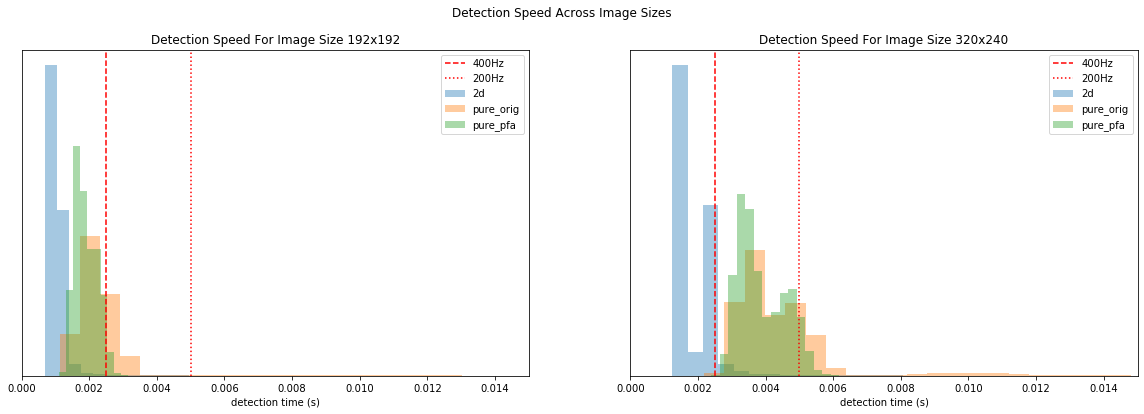

In [38]:
plt.figure(figsize=(20, 6))
plt.suptitle("Detection Speed Across Image Sizes")
sizes = [s for s in params.size if s != "original"]

for i, size in enumerate(sizes):
    plt.subplot(1, 2, i +1)
    plt.title(f"Detection Speed For Image Size {size}")
    for algo in params.algorithm:
        data = load(dataset="lpw", size=size, algorithm=algo)
        sns.distplot(data["time"], kde=False, norm_hist=True, label=algo)
    plt.axvline(x=1/400, color="r", ls="--", label="400Hz")
    plt.axvline(x=1/200, color="r", ls=":", label="200Hz")
    plt.legend()
    plt.yticks([], [])
    plt.xlabel("detection time (s)")
    plt.xlim([0, 0.015])

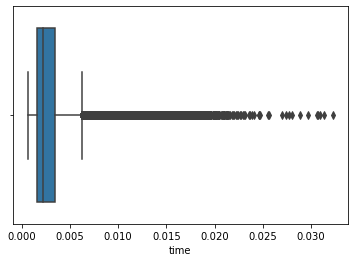

In [44]:
data = load(dataset="lpw", size=("192x192", "320x240"))

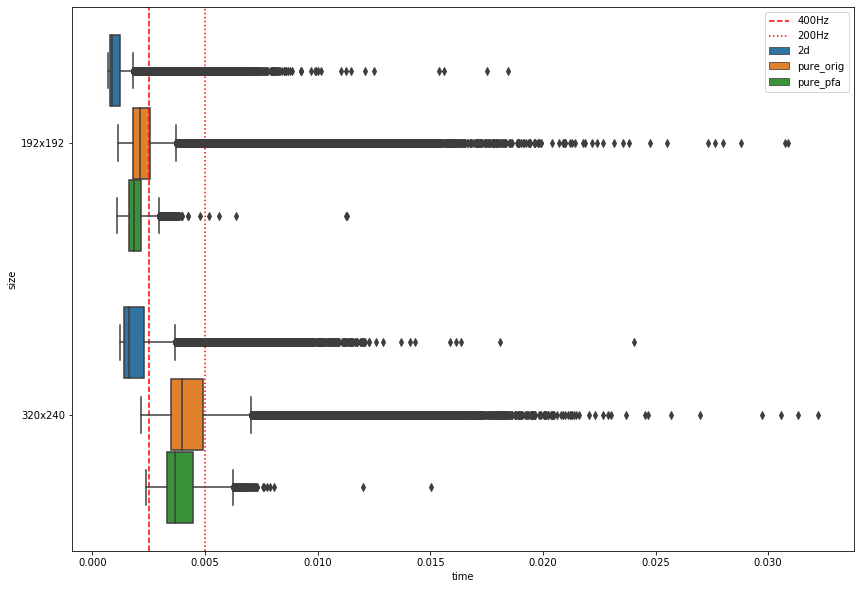

In [53]:
plt.figure(figsize=(14,10))
plt.axvline(x=1/400, color="r", ls="--", label="400Hz")
plt.axvline(x=1/200, color="r", ls=":", label="200Hz")
sns.boxplot(data=data, x="time", hue="algorithm", y="size")
plt.legend()